In [59]:
import skimage
import matplotlib.pyplot as plt
import numpy as np

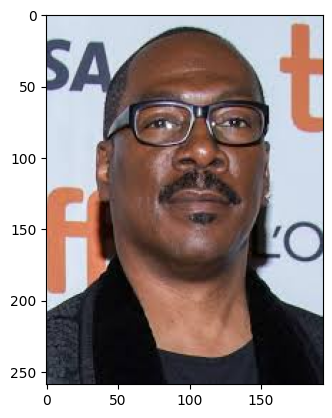

In [60]:
eddie = skimage.io.imread("eddie.jpg")
plt.imshow(eddie)

# Convertir eddie en Lab
# Séparer L et ab
# "Discrétiser" ab avec des blocs de taille 10

In [61]:
eddie_Lab = skimage.color.rgb2lab(eddie)
eddie_L = eddie_Lab[:,:,0]
eddie_ab = eddie_Lab[:,:,1:]

In [62]:
eddie_ab[0,0]

array([-1.30874414, -8.20303698])

In [63]:
eddie_ab_quantized = (eddie_ab//10)*10 + 5
eddie_ab_quantized

array([[[ -5.,  -5.],
        [ -5.,  -5.],
        [ -5.,  -5.],
        ...,
        [-15.,  -5.],
        [ -5.,  -5.],
        [ -5.,  -5.]],

       [[ -5.,  -5.],
        [ -5.,  -5.],
        [ -5.,  -5.],
        ...,
        [ -5.,  -5.],
        [ -5.,  -5.],
        [ -5.,  -5.]],

       [[ -5.,  -5.],
        [ -5.,  -5.],
        [ -5.,  -5.],
        ...,
        [ -5.,  -5.],
        [ -5.,  -5.],
        [ -5.,  -5.]],

       ...,

       [[  5.,  -5.],
        [  5.,  -5.],
        [  5.,  -5.],
        ...,
        [  5.,  -5.],
        [  5.,  -5.],
        [  5.,  -5.]],

       [[  5.,  -5.],
        [  5.,  -5.],
        [  5.,  -5.],
        ...,
        [  5.,  -5.],
        [  5.,  -5.],
        [  5.,  -5.]],

       [[  5.,  -5.],
        [  5.,  -5.],
        [  5.,  -5.],
        ...,
        [  5.,  -5.],
        [  5.,  -5.],
        [  5.,  -5.]]])

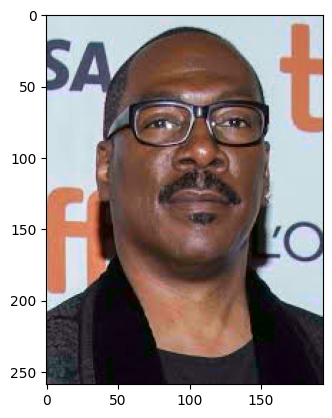

In [64]:
plt.imshow(skimage.color.lab2rgb(np.stack([eddie_L, eddie_ab_quantized[:,:,0], eddie_ab_quantized[:,:,1]], axis=2)))

In [ ]:
dict = {}
dict_reverse = {}
max_class = 0

def ab_to_class(ab):
    global max_class
    ab_tuple = (ab[0], ab[1])
    if ab_tuple not in dict.keys():
        dict[ab_tuple] = max_class
        dict_reverse[max_class]= ab_tuple
        max_class += 1
    return dict[ab_tuple]


def classify_ab(image):
    return np.apply_along_axis(ab_to_class, axis=2, arr=image)


array([[0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])